In [6]:
import pandas as pd
df = pd.read_csv("advertising.csv")
display(df)
df.info()

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


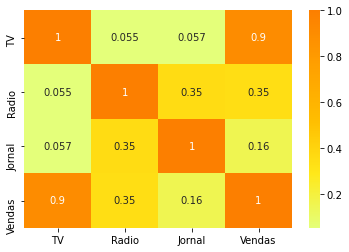

In [9]:
#importando bibliotecas para construir graficos
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), cmap = 'Wistia', annot =True)
plt.show()

# Machine Learning

Variavel Independente = é a que influencia, determina ou afeta outra variável;
referida como fator determinante, condição ou causa para ocorrência de determinada resposta. (x)

Variavel Dependente = a sua resposta varia em virtude dos diferentes valores que a variável independente pode assumir; (y)



In [14]:
#Importando bibliotecas de treino para machine learning

from sklearn.model_selection import train_test_split

#definindo variaveis independentes e dependentes

x = df.drop("Vendas", axis = 1)
y = df["Vendas"]

#definindo variaveis de treino e teste

x_treino,x_teste,y_treino,y_teste = train_test_split(x, y, test_size = 0.3) 
# maior parte dos dados é direcionada para o aprendizado da maquina, 30% são para teste, 70% para aprendizado


In [16]:
#Importandobibliotecas de teste da maquina, usando dois metodos para ver qual trará melhores resultados
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

linear = LinearRegression()
randomforest = RandomForestRegressor()

# Treinando pelo sistema linear e random
linear.fit(x_treino, y_treino)
randomforest.fit(x_treino, y_treino)



RandomForestRegressor()

Teste da AI e Avaliação do Melhor Modelo
Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece
Também vamos olhar o MSE (Erro Quadrático Médio) -> diz o quanto o nosso modelo "erra" quando tenta fazer uma previsão

In [20]:
#Testando qual funcionou melhor, usando metrics
from sklearn import metrics
#  partir dos valores de x existentes ele preverá um valor para y

teste_linear = linear.predict(x_teste)

teste_random = randomforest.predict(x_teste)

#  comparando se os valores de Y existentes são parecido com os que ele preveu anteriormente
#Metrica r2, quantos por cento de precisão com os valores originais

r2_linear = metrics.r2_score(y_teste, teste_linear)
r2_random = metrics.r2_score(y_teste, teste_random)
print(r2_linear, r2_random)

#taxa de incerteza

m_linear = metrics.mean_squared_error(y_teste, teste_linear)

m_random = metrics.mean_squared_error(y_teste, teste_random)

print(m_linear, m_random)


0.8730816408157164 0.9406283472561571
3.98552521765365 1.864404966666659


,Vendais reais,Previsão
0,18.4,17.897
1,22.3,22.374
2,25.5,24.402
3,14.6,14.428
4,19.2,19.591
5,17.4,19.961
6,22.2,22.119
7,20.6,19.384
8,5.5,6.059
9,11.9,12.288


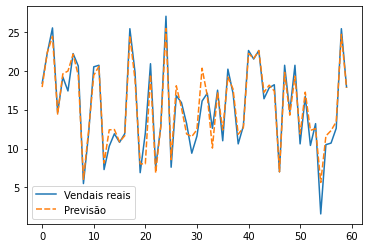

In [22]:
# A partir dos ultimos resultados, percebemos que o metodo de aprendizagem rangem foi maos eficaz

#criando tabela para comparar
analise = pd.DataFrame()
analise["Vendais reais"] = y_teste
analise['Previsão'] =  teste_random
analise = analise.reset_index(drop = True)

display(analise)
sns.lineplot(data = analise)
plt.show()